##### 掃描 QRCode 切換影像效果
這篇教學延伸「辨識 QRCode 和 BarCode」文章，透過攝影鏡頭辨識 QRCode 之後，即時將攝影機的影像套用模糊、馬賽克以及負片...等效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 掃描 QRCode 切換影像效果 
延伸「辨識 QRCode 和 BarCode」文章，在即時辨識 QRCode 的程式碼中，當偵測到 QRCode 為 a1 時套用模糊效果，如果是 a2 就套用馬賽克效果，如果是 a3 就套用負片效果，詳細說明寫在程式碼中：

* 參考：辨識 QRCode 和 BarCode、影像模糊化、更快更好的負片效果做法、影像的馬賽克效果

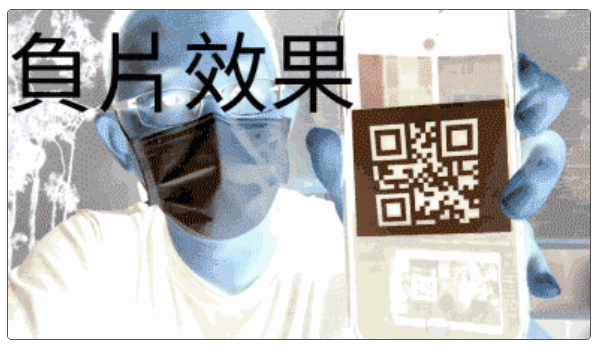

In [ ]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

cap = cv2.VideoCapture(0)     # 讀取攝影鏡頭

# 定義加入文字函式
def putText(x,y,text,size=20,color=(0,0,0)):
    global img
    fontpath = 'NotoSansTC-Regular.ttf'            # 字型
    font = ImageFont.truetype(fontpath, size)      # 定義字型與文字大小
    imgPil = Image.fromarray(img)                  # 轉換成 PIL 影像物件
    draw = ImageDraw.Draw(imgPil)                  # 定義繪圖物件
    draw.text((x, y), text, fill=color, font=font) # 加入文字
    img = np.array(imgPil)                         # 轉換成 np.array

# 定義馬賽克函式
def mosaic(image, level):
    size = image.shape       # 取得原始圖片的資訊
    h = int(size[0]/level)   # 按照比例縮小後的高度 ( 使用 int 去除小數點 )
    w = int(size[1]/level)   # 按照比例縮小後的寬度 ( 使用 int 去除小數點 )
    output = cv2.resize(image, (w,h), interpolation=cv2.INTER_LINEAR)   # 根據縮小尺寸縮小
    output = cv2.resize(output, (size[1],size[0]), interpolation=cv2.INTER_NEAREST) # 放大到原本的大小
    return output

qrcode = cv2.QRCodeDetector()    # QRCode 偵測器

while True:
    ret, frame = cap.read()      # 讀取攝影鏡頭影像
    if not ret:
        print("Cannot receive frame")
        break
    img = cv2.resize(frame,(720,420))   # 縮小尺寸加快速度
    ok, data, bbox, rectified = qrcode.detectAndDecodeMulti(img)  # 偵測並辨識 QRCode
    # 如果偵測到 QRCode
    if ok:
        for i in range(len(data)):
            text = data[i]           # 取出內容
            # 如果內容是 a1，套用模糊效果
            if text=='a1':
                img = cv2.blur(img, (20, 20))
                putText(0,0,'模糊效果',100,(255,255,255))
            # 如果內容是 a2，套用馬賽克效果
            elif text == 'a2':
                img = mosaic(img, 15)
                putText(0,0,'馬賽克效果',100,(255,255,255))
            # 如果內容是 a2，套用片效果
            elif text == 'a3':
                img = 255-img
                putText(0,0,'負片效果',100,(0,0,0))

    cv2.imshow('oxxostudio', img)     # 預覽影像
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()